In [1]:
from skimage.filters import sobel
from skimage import morphology
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [2]:
DATA_PATH = 'Breast cancer images/Dataset'

In [10]:
def create_test_data():
    testing_data = []
    for img in tqdm(os.listdir(DATA_PATH)):
        if img != "Thumbs.db" :
            path = os.path.join(DATA_PATH, img)
            img_data = cv2.imread(path, 0)
            testing_data.append(np.array(img_data))
    return testing_data

In [11]:
data = create_test_data()

In [5]:
def findSegmentation(gambar):
    
    elevation_map = sobel(gambar)

    markers = np.zeros_like(gambar)
    markers[gambar < 30] = 1
    markers[gambar > 150] = 2

    segmentation = morphology.watershed(elevation_map, markers)

    return segmentation

In [6]:
def color(data):
    newData=[]
    for gambar in data:
        newGambar = findSegmentation(gambar)
        newData.append(newGambar)
    return newData

In [7]:
newData = color(data)

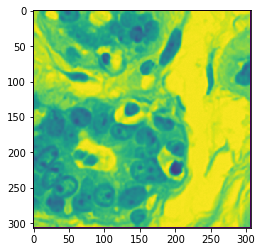

In [14]:
cv2.imwrite("greyscale.png",data[0])

plt.imshow(data[0])
plt.show()